# Название проекта: "Большой БигДатовский и Властелин Пандаса: Анализ фильмов и сериалов с IMBD"

## Описание датасета:


IMDB - это популярный зарубежный сайт с рейтингами на кино и сериалы. Там любой желающий может поставить рейтинг фильму или сериалу, а также написать рецензию.

Этот датасет содержит более 7-ми тысяч фильмов и сериалов с оценками, взятыми с IMDB.

### Содержание

Колонки

Name: Название фильма/сериала

Data: Дата создания

Rate: Рейтинг с IMDB

Votes: Количества голосов

Genre: Жанр

Duration: Продолжительность

Type: тип ('Series' или 'Film')

### Возрастной рейтинг:

TV-Y: Designed to be appropriate for all children

TV-Y7: Suitable for ages 7 and up

G: Suitable for General Audiences

TV-G: Suitable for General Audiences

PG: Parental Guidance suggested

TV-PG: Parental Guidance suggested

PG-13: Parents strongly cautioned. May be Inappropriate for ages 12 and under.

TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under.

R: Restricted. May be inappropriate for ages 17 and under.

TV-MA: For Mature Audiences. May not be suitable for ages 17 and under.

NC-17: Inappropriate for ages 17 and under

### Доп столбцы

Episodes: Number of Episodes only for series

Nudity, violence and etc.: How much does it have of these

Ссылка на датасет: [IMDB-Rating](https://www.kaggle.com/datasets/mazenramadan/imdb-most-popular-films-and-series)

Let's code!!! 

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.api as sm

# Причесываем датасет

In [123]:
data = pd.read_csv(r'/Users/User/Desktop/VS code/BDA_2024-2025/project/imdb.csv')
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


Удалим повторяющиеся фильмы и сериалы (поверьте, они есть)

In [124]:
data = data.drop_duplicates(subset='Name')
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


Уберем фильмы/сериалы без рейтинга

In [125]:
data = data[data['Rate'] != 'No Rate']
data = data[data['Votes'] != 'No Votes']
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,"37,492",Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,"150,448","Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,"100,668","Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


In [126]:
data['Votes'] = data['Votes'].str.replace(',','').astype(float)
data['Rate'] = data['Rate'].astype(float)
data

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163.0,"Action, Adventure, Thriller",163.0,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375.0,"Crime, Drama, Thriller",90.0,Film,R,-,NaN,NaN,Severe,NaN,Moderate
2,The Many Saints of Newark,2021,6.4,27145.0,"Crime, Drama",120.0,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443.0,"Action, Adventure, Sci-Fi",97.0,Film,PG-13,-,NaN,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636.0,"Action, Adventure, Drama",155.0,Film,PG-13,-,NaN,Moderate,NaN,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,37492.0,Horror,91.0,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,150448.0,"Crime, Drama, Film-Noir",107.0,Film,Passed,-,NaN,Mild,NaN,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,100668.0,"Crime, Drama, Thriller",117.0,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887.0,"Comedy, Drama, Romance",100.0,Film,PG-13,-,NaN,NaN,Mild,Moderate,NaN


# Проверка первой гипотезы

$H_0$: Рейтинги фильмов с высоким количеством голосов (например, >10000) в среднем не отличаются от рейтингов фильмов с меньшим количеством голосов.

$H_1$: Фильмы с большим количеством голосов имеют более высокие рейтинги в среднем

In [127]:
Films = data[data['Type'] == 'Film']
films_huge_votes = Films[Films['Votes'] > 10000]
films_huge_votes.sort_values(by='Votes', ascending=False)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
201,The Shawshank Redemption,1994,9.3,2474122.0,Drama,142.0,Film,R,-,Mild,Moderate,Severe,Mild,Moderate
270,The Dark Knight,2008,9.0,2428117.0,"Action, Crime, Drama",152.0,Film,PG-13,-,NaN,Moderate,Mild,Mild,Severe
318,Inception,2010,8.8,2178860.0,"Action, Adventure, Sci-Fi",148.0,Film,PG-13,-,NaN,Moderate,Mild,Mild,Moderate
339,Fight Club,1999,8.8,1948261.0,Drama,139.0,Film,R,-,Moderate,Severe,Severe,Moderate,Severe
320,Pulp Fiction,1994,8.9,1915230.0,"Crime, Drama",154.0,Film,R,-,Moderate,Severe,Severe,Severe,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,The Little Vampire,2000,5.8,10173.0,"Adventure, Comedy, Family",95.0,Film,PG,-,No Rate,Mild,NaN,Mild,Mild
3225,Pánico en el Transiberiano,1972,6.6,10137.0,"Adventure, Horror, Sci-Fi",91.0,Film,R,-,NaN,Moderate,NaN,Mild,Moderate
4334,Spontaneous,2020,6.5,10096.0,"Comedy, Horror, Romance",101.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
3448,The Nun's Story,1959,7.6,10056.0,Drama,149.0,Film,Not Rated,-,Mild,Mild,NaN,Mild,Mild


In [128]:
films_little_votes = Films[Films['Votes'] <= 10000]
films_little_votes.sort_values(by='Votes', ascending=False)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
4571,Locked Down,2021,5.2,9994.0,"Comedy, Crime, Romance",118.0,Film,R,-,Mild,NaN,Moderate,Mild,Mild
3721,Psycho Goreman,2020,6.3,9898.0,"Comedy, Horror, Sci-Fi",95.0,Film,Not Rated,-,NaN,Severe,Moderate,NaN,Mild
4331,True History of the Kelly Gang,2019,6.0,9824.0,"Biography, Crime, Drama",124.0,Film,R,-,Moderate,Severe,Severe,Mild,Severe
2665,Dronningen,2019,7.1,9820.0,Drama,127.0,Film,NC-17,-,Severe,Mild,Mild,Mild,Moderate
914,Annette,2021,6.4,9794.0,"Drama, Musical, Romance",141.0,Film,R,-,Severe,Moderate,Moderate,Moderate,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,The Black Book,2021,3.3,69.0,Horror,75.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4991,The Forgiven,2021,6.8,62.0,Drama,117.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4818,Snuff Films,2007,4.1,61.0,Horror,73.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate
4367,The Survivor,2021,7.4,53.0,"Biography, Drama",129.0,Film,NaN,-,No Rate,No Rate,No Rate,No Rate,No Rate


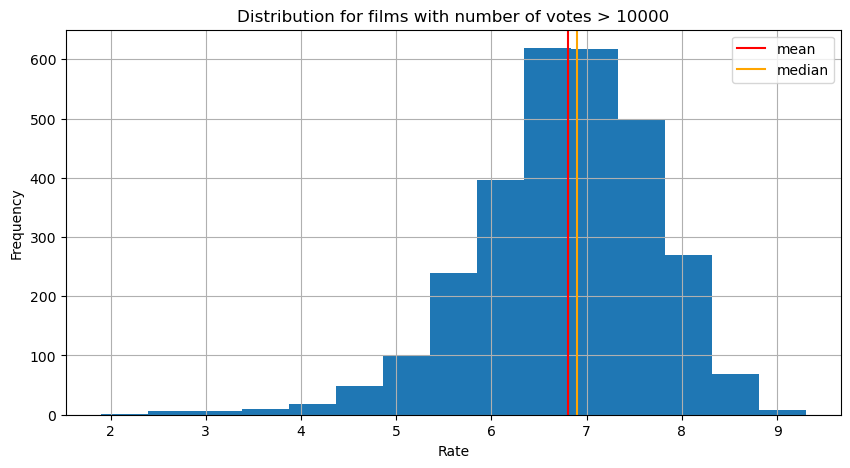

In [129]:
rate_counts_huge= films_huge_votes.Rate.astype(float)
plt.figure(figsize = (10,5))
rate_counts_huge.hist(bins=15)
plt.axvline(rate_counts_huge.mean(), color='red', label='mean')
plt.axvline(rate_counts_huge.median(), color='orange', label='median')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution for films with number of votes > 10000')
plt.legend()
plt.show()

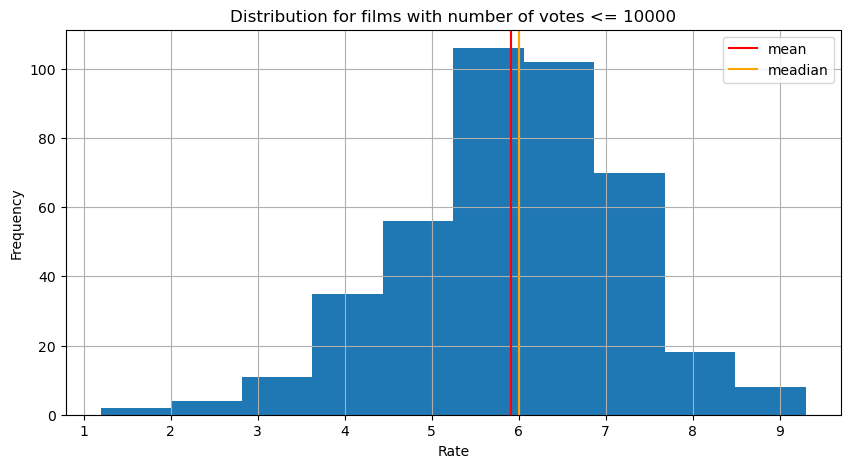

In [130]:
rate_counts_little = films_little_votes.Rate.astype(float)
plt.figure(figsize = (10,5))
rate_counts_little.hist(bins=10)
plt.axvline(rate_counts_little.mean(), color='red', label='mean')
plt.axvline(rate_counts_little.median(), color='orange', label='meadian')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution for films with number of votes <= 10000')
plt.legend()
plt.show()

Распределения практически нормальные, выборки несвязные - используем двухвыборочный критерий Стьюдента!

Двувыборочный критерий Стьюдента (проверка гипотезы о равенстве средних двух выборок)
$$H_0: \mu_1 = \mu_2\\
H_1: \mu_1 \ne \mu_2$$
Распределение выборок должно не иметь выбросов, быть умеренно асимметричным (т.е. близким к нормальному).

In [131]:
from scipy import stats

stats.ttest_ind(rate_counts_huge, rate_counts_little)

TtestResult(statistic=17.02778167025298, pvalue=2.138480742511395e-62, df=3314.0)

Таким образом получили, что нулевая гипотеза $H_0$ не подтвердилась, то есть мы подтвердили справедливость $H_1$. Это значит, что средние рейтинги не совпали.

А в нашем случае вышло,  что чем больше отзывов у фильма, тем выше у него рейтинг!

# Проверка второй гипотезы

$H_0$: Средний рейтинг фильмов с возрастным ограничением "R" равне среднему рейтингу фильмов с возрастным ограничением "PG-13".

$H_1$: Средний рейтинг фильмов с возрастным ограничением "R" не равен среднему рейтингу фильмов с возрастным ограничением "PG-13".

In [132]:
films_r = Films[Films['Certificate']=='R']
films_pg = Films[Films['Certificate']=='PG-13']

rate_counts_r = films_r.Rate.astype(float)
rate_counts_pg = films_pg.Rate.astype(float)
rate_counts_r

1       6.3
2       6.4
20      7.7
29      6.1
31      6.3
       ... 
5013    6.3
5016    7.1
5020    6.3
5025    7.3
5027    6.3
Name: Rate, Length: 1473, dtype: float64

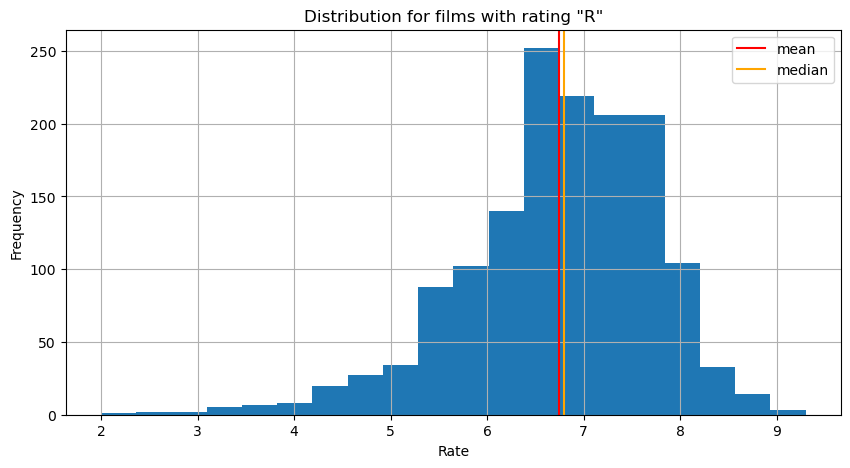

In [133]:
plt.figure(figsize = (10,5))
rate_counts_r.hist(bins=20)
plt.axvline(rate_counts_r.mean(), color='red', label='mean')
plt.axvline(rate_counts_r.median(), color='orange', label='median')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution for films with rating "R"')
plt.legend()
plt.show()

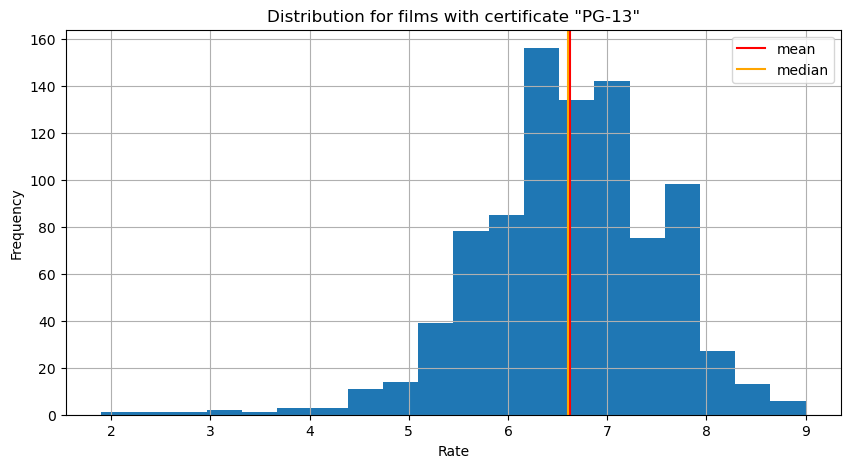

In [134]:
plt.figure(figsize = (10,5))
rate_counts_pg.hist(bins=20)
plt.axvline(rate_counts_pg.mean(), color='red', label='mean')
plt.axvline(rate_counts_pg.median(), color='orange', label='median')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution for films with certificate "PG-13"')
plt.legend()
plt.show()

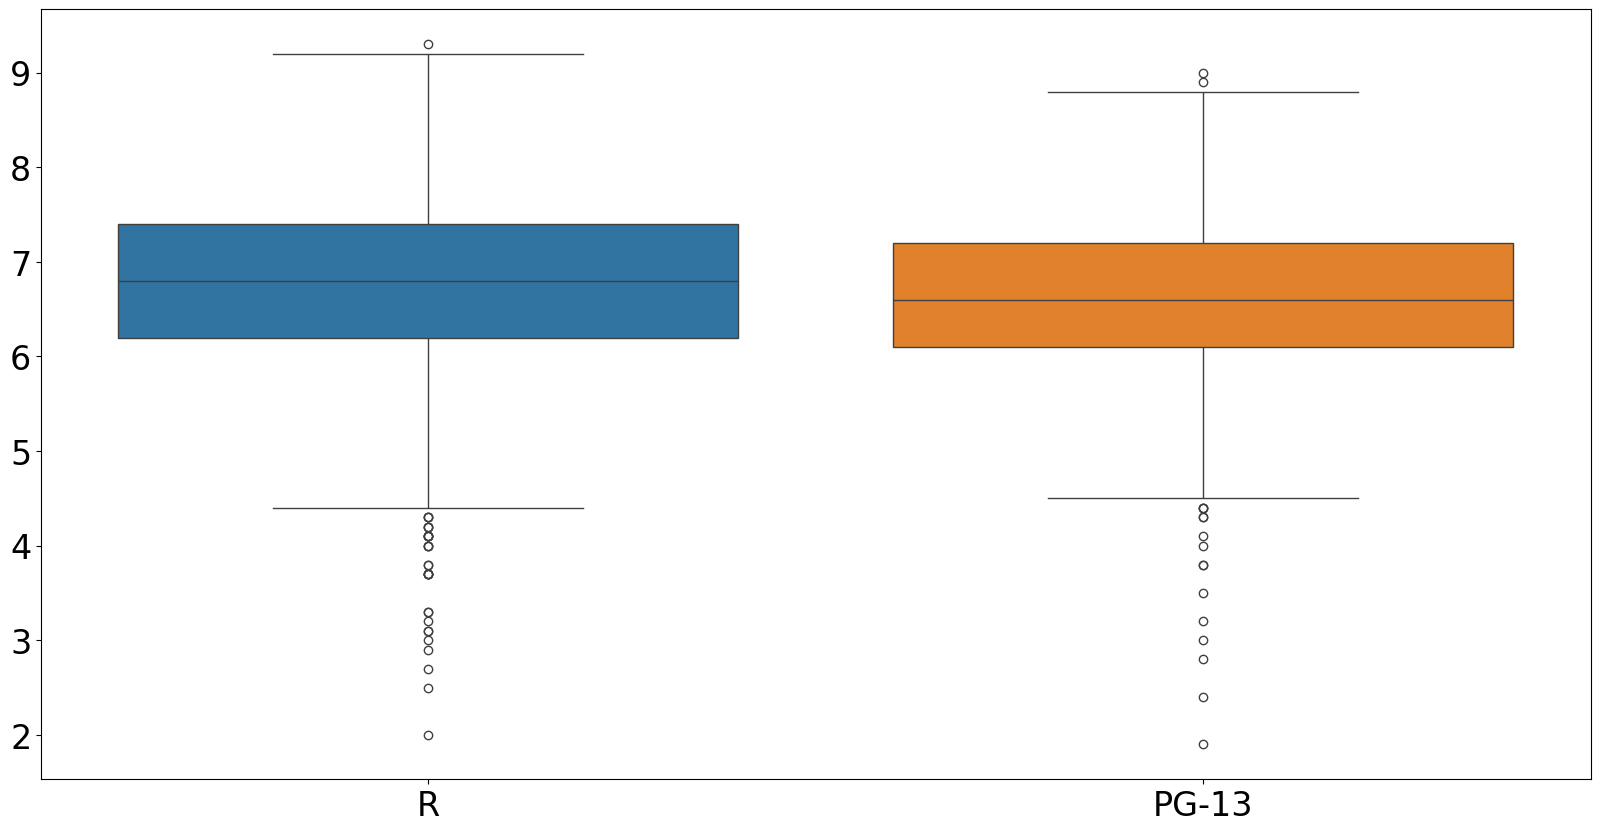

In [135]:
df = pd.DataFrame(
    {'R': rate_counts_r,
     'PG-13': rate_counts_pg
    }
)

plt.figure(figsize=(20,10))
plt.gca().tick_params(axis='both', which='major', labelsize=24)
sns.boxplot(data=df)
plt.xticks([0,1], ['R', 'PG-13'])
plt.show()

Чето много выбросов...

Проверим на тестах Шапиро о нормальности распредлений

In [136]:
stats.shapiro(rate_counts_r)

ShapiroResult(statistic=0.9671040456975281, pvalue=8.446728504859191e-18)

In [137]:
stats.shapiro(rate_counts_pg)

ShapiroResult(statistic=0.9758998727406755, pvalue=5.768768887236057e-11)

Таким образом распределение рейтингов для данных возрастных ограничений будем считать ненормальными. Как следствие используем тест Уилкосона-Манна-Уитни.

In [138]:
stats.mannwhitneyu(rate_counts_r, rate_counts_pg)

MannwhitneyuResult(statistic=719793.5, pvalue=6.228689480555366e-05)

А если бы считали нормально-распределенными наборами данных

In [139]:
stats.ttest_ind(rate_counts_r, rate_counts_pg)

TtestResult(statistic=2.943208481222916, pvalue=0.003279973495395114, df=2361.0)

Выводы пока непонятны...

# Модель линейной регрессии

Посмотрим на зависимость целевой переменной Rate от выбранных Votes, Duration, Date, Nudity, Violence, Alcohol. Для этого сначала подготовим датасет.

Берем только фильмы с большим числом отзывов!

In [651]:
# удаляем nan значения
Films_new = Films.dropna(subset=['Nudity', 'Violence', 'Alcohol'])

#выделяем нужное число голосов (не слишком маленькое)
Films_new = Films_new[Films_new['Votes'] >= 200000] 

#продолжительность фильмов также должна быть немаленькой и не огромной (от часа до трех)
Films_new = Films_new[Films_new['Duration'] >= 60]
Films_new = Films_new[Films_new['Duration'] <= 180]

Теперь придется перекодировать Nudity, Violence, Alcohol в иные значения. Для начала посмотрим все уникальные для них.

In [652]:
Films_new['Nudity'].unique()

array(['Mild', 'Moderate', 'Severe', 'No Rate'], dtype=object)

In [653]:
Films_new['Violence'].unique()

array(['Moderate', 'Severe', 'Mild', 'No Rate'], dtype=object)

In [654]:
Films_new['Alcohol'].unique()

array(['Mild', 'Moderate', 'Severe', 'No Rate'], dtype=object)

Делаем замену у всех: 

No Rate -> 0, Severe -> 1, Moderate -> 2, Mild -> 3

In [655]:
score_change = {'No Rate': 0, 'Severe': 1, 'Moderate': 2, 'Mild': 3}

Films_new['Nudity'] = Films_new['Nudity'].map(score_change)
Films_new['Violence'] = Films_new['Violence'].map(score_change)
Films_new['Alcohol'] = Films_new['Alcohol'].map(score_change)
Films_new

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
25,Spectre,2015,6.8,407514.0,"Action, Adventure, Thriller",148.0,Film,PG-13,-,3,2,Mild,3,Moderate
26,Casino Royale,2006,8.0,613873.0,"Action, Adventure, Thriller",144.0,Film,PG-13,-,3,2,Mild,3,Moderate
38,Venom,2018,6.7,414787.0,"Action, Adventure, Sci-Fi",112.0,Film,PG-13,-,3,2,Moderate,3,Moderate
39,Skyfall,2012,7.8,658977.0,"Action, Adventure, Thriller",143.0,Film,PG-13,-,3,2,Mild,3,Moderate
65,Quantum of Solace,2008,6.6,424649.0,"Action, Adventure, Thriller",106.0,Film,PG-13,-,3,2,Mild,3,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,The Adjustment Bureau,2011,7.0,251126.0,"Romance, Sci-Fi, Thriller",106.0,Film,PG-13,-,3,3,Moderate,3,Mild
4878,Kiss Kiss Bang Bang,2005,7.5,221172.0,"Comedy, Crime, Mystery",103.0,Film,R,-,2,1,Severe,2,Mild
4940,Lucky Number Slevin,2006,7.7,306275.0,"Crime, Drama, Thriller",110.0,Film,R,-,2,1,Severe,2,Moderate
4961,4: Rise of the Silver Surfer,2007,5.6,257269.0,"Action, Adventure, Fantasy",92.0,Film,PG,-,3,3,Mild,3,Mild


И удалим все фильмы у которых No Rate в одной из колонок, так как мы ничего не сможем сказать о выставленном значении критерия в таком случае.

In [656]:
Films_new = Films_new[Films_new['Alcohol'] != 0]
Films_new = Films_new[Films_new['Nudity'] != 0]
Films_new = Films_new[Films_new['Violence'] != 0]
Films_new

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
25,Spectre,2015,6.8,407514.0,"Action, Adventure, Thriller",148.0,Film,PG-13,-,3,2,Mild,3,Moderate
26,Casino Royale,2006,8.0,613873.0,"Action, Adventure, Thriller",144.0,Film,PG-13,-,3,2,Mild,3,Moderate
38,Venom,2018,6.7,414787.0,"Action, Adventure, Sci-Fi",112.0,Film,PG-13,-,3,2,Moderate,3,Moderate
39,Skyfall,2012,7.8,658977.0,"Action, Adventure, Thriller",143.0,Film,PG-13,-,3,2,Mild,3,Moderate
65,Quantum of Solace,2008,6.6,424649.0,"Action, Adventure, Thriller",106.0,Film,PG-13,-,3,2,Mild,3,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,The Adjustment Bureau,2011,7.0,251126.0,"Romance, Sci-Fi, Thriller",106.0,Film,PG-13,-,3,3,Moderate,3,Mild
4878,Kiss Kiss Bang Bang,2005,7.5,221172.0,"Comedy, Crime, Mystery",103.0,Film,R,-,2,1,Severe,2,Mild
4940,Lucky Number Slevin,2006,7.7,306275.0,"Crime, Drama, Thriller",110.0,Film,R,-,2,1,Severe,2,Moderate
4961,4: Rise of the Silver Surfer,2007,5.6,257269.0,"Action, Adventure, Fantasy",92.0,Film,PG,-,3,3,Mild,3,Mild


In [657]:
features=['Date', 'Votes', 'Duration', 'Nudity', 'Violence', 'Alcohol']

In [658]:
X = sm.add_constant(Films_new[features])
X

,const,Date,Votes,Duration,Nudity,Violence,Alcohol
25,1.0,2015,407514.0,148.0,3,2,3
26,1.0,2006,613873.0,144.0,3,2,3
38,1.0,2018,414787.0,112.0,3,2,3
39,1.0,2012,658977.0,143.0,3,2,3
65,1.0,2008,424649.0,106.0,3,2,3
...,...,...,...,...,...,...,...
4874,1.0,2011,251126.0,106.0,3,3,3
4878,1.0,2005,221172.0,103.0,2,1,2
4940,1.0,2006,306275.0,110.0,2,1,2
4961,1.0,2007,257269.0,92.0,3,3,3


Количество оценок можно прологарифмировать - значения уж очень большие

In [659]:
X['Votes'] = np.log(X['Votes'])
X

,const,Date,Votes,Duration,Nudity,Violence,Alcohol
25,1.0,2015,12.917831,148.0,3,2,3
26,1.0,2006,13.327543,144.0,3,2,3
38,1.0,2018,12.935520,112.0,3,2,3
39,1.0,2012,13.398444,143.0,3,2,3
65,1.0,2008,12.959018,106.0,3,2,3
...,...,...,...,...,...,...,...
4874,1.0,2011,12.433710,106.0,3,3,3
4878,1.0,2005,12.306696,103.0,2,1,2
4940,1.0,2006,12.632239,110.0,2,1,2
4961,1.0,2007,12.457878,92.0,3,3,3


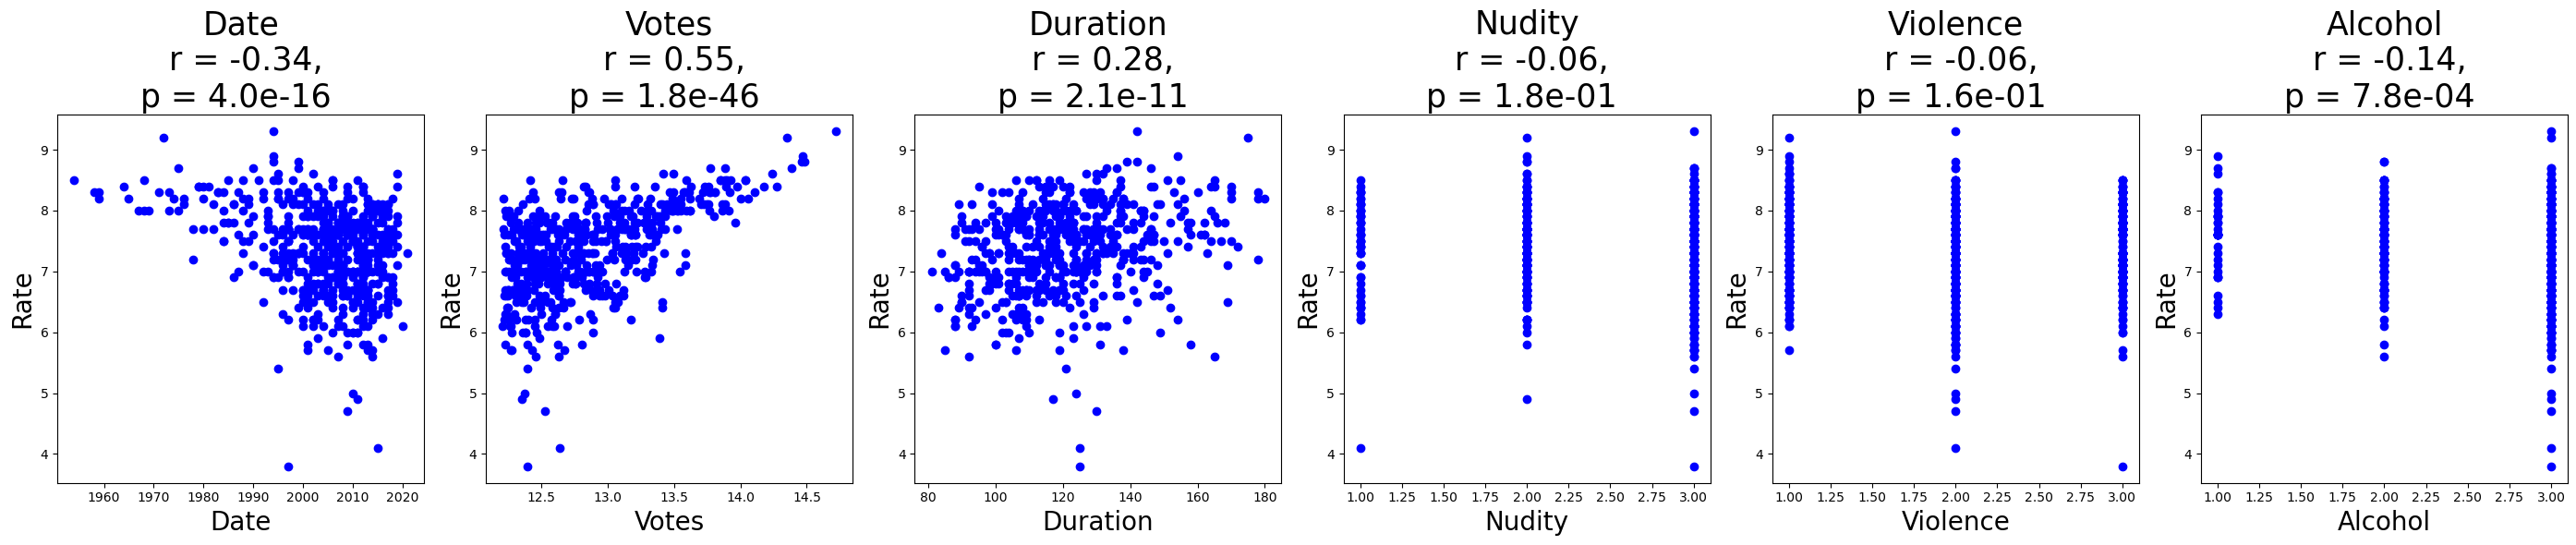

In [660]:
plt.figure(figsize=(28,6))

for i,feature in enumerate(features,start=1):
    plt.subplot(1,6,i)
    x = X[feature]
    y = Films_new['Rate']
    regres = stats.linregress(x,y)
    plt.plot(x,y,'bo')
    plt.ylabel("Rate", fontsize=20)
    plt.xlabel(feature, fontsize=20)
    plt.title(f'{feature}\n r = {regres.rvalue:.2f},\np = {regres.pvalue:.1e} ', fontsize=25)
plt.tight_layout()

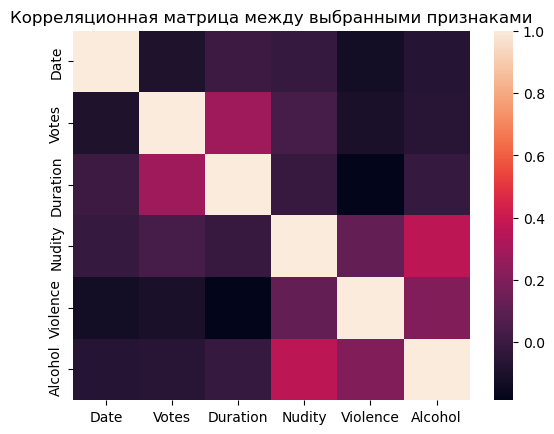

In [661]:
sns.heatmap(Films_new[features].corr())
plt.title('Корреляционная матрица между выбранными признаками')
plt.show()

Это предварительная картинка на матрицу ковариаций.

In [662]:
first_results = sm.OLS(Films_new['Rate'], X).fit()

In [663]:
first_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     71.64
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           7.01e-66
Time:                        16:09:52   Log-Likelihood:                -458.76
No. Observations:                 559   AIC:                             931.5
Df Residuals:                     552   BIC:                             961.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8528      4.401      9.056      0.000      31.209      48.497
Date          -0.0209      0.002     -9.763      0.000      -0.025      -0.017
Votes          0.7291      0.049     14.744      0.000       0.632       0.826
Duration       0.0051      0.001      4.104      0.000       0.003       0.008
Nudity        -0.0535      0.039     -1.385      0.167      -0.129       0.022
Violence      -0.0052      0.032     -0.164      0.870      -0.067       0.057
Alcohol       -0.1443      0.044     -3.318      0.001      -0.230      -0.059
==============================================================================
Omnibus:                      141.781   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.132
Skew:                          -1.142   Prob(JB):                    2.05e-110
Kurtosis:                       7.059   Cond. No.                     3.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P-value огромен у Nudity и Violence (больше 0.05), поэтому выкинем их и посмотрим на R-squared. Оставим только Alcоhol, выходит.

Text(0.5, 1.0, 'Корреляционная матрица между выбранными признаками')

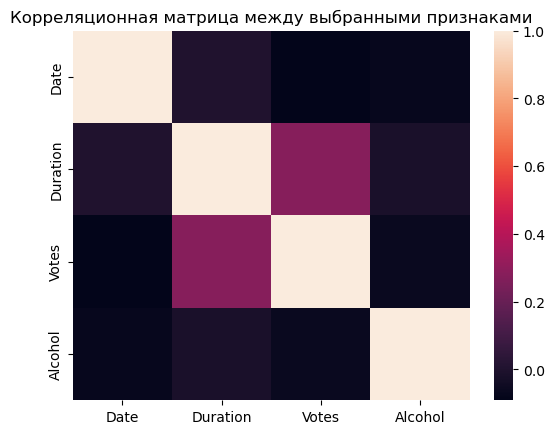

In [664]:
new_features = ['Date', 'Duration', 'Votes', 'Alcohol']


sns.heatmap(Films_new[new_features].corr())
plt.title('Корреляционная матрица между выбранными признаками')

In [665]:
X_new = sm.add_constant(Films_new[new_features])
X_new['Votes'] = np.log(X_new.Votes)
X_new

,const,Date,Duration,Votes,Alcohol
25,1.0,2015,148.0,12.917831,3
26,1.0,2006,144.0,13.327543,3
38,1.0,2018,112.0,12.935520,3
39,1.0,2012,143.0,13.398444,3
65,1.0,2008,106.0,12.959018,3
...,...,...,...,...,...
4874,1.0,2011,106.0,12.433710,3
4878,1.0,2005,103.0,12.306696,2
4940,1.0,2006,110.0,12.632239,2
4961,1.0,2007,92.0,12.457878,3


Формула для VIF (Variance Inflation Factor). Если он будет больше четырех (ещё одно консенсусное значение, такое же как p-value или минимальное число наблюдений в группе), то это значит, что эта переменная коррелирована с какой-то из присутствующих и её нужно убрать из модели. Таким образом делаем еще одну проверку.

In [666]:
def get_variance_inflation_factor(X,feature):
    """
    Calculate variance inflation factor 
    for the feature for given dataset X
    assume that const is included in X
    
    return VIF
    """
    _X = X[[col for col in X.columns if col != feature]]
    _y = X[feature]
    
    res = sm.OLS(_y, _X).fit()
    
    R_sq = res.rsquared
    
    return 1./(1 - R_sq) 

In [667]:
for feature in new_features:
    vif = get_variance_inflation_factor(X_new,feature)
    print(feature, f'{vif:.2f}')

Date 1.01
Duration 1.08
Votes 1.09
Alcohol 1.01


Все сделали правильно - мы крутые!

In [668]:
y = Films_new.Rate
results = sm.OLS(y, X_new).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.73e-67
Time:                        16:09:52   Log-Likelihood:                -459.75
No. Observations:                 559   AIC:                             929.5
Df Residuals:                     554   BIC:                             951.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8266      4.357      9.141      0.000      31.268      48.385
Date          -0.0209      0.002     -9.837      0.000      -0.025      -0.017
Duration       0.0052      0.001      4.241      0.000       0.003       0.008
Votes          0.7230      0.049     14.693      0.000       0.626       0.820
Alcohol       -0.1677      0.040     -4.209      0.000      -0.246      -0.089
==============================================================================
Omnibus:                      140.302   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.914
Skew:                          -1.134   Prob(JB):                    9.23e-108
Kurtosis:                       7.002   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Как видим R-squared практически не изменился. Теперь посмотрим на то разумно ли мы провели анализ этих данных, то есть не добавили ли лишних признаков и т.д.

Логично посмотреть на R-squared для Rate <-> Votes.

In [669]:
y = Films_new['Rate']
x = sm.add_constant(Films_new['Votes'])
x['Votes'] = np.log(x.Votes)

keke_res = sm.OLS(y, x).fit()
keke_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     247.9
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.82e-46
Time:                        16:09:52   Log-Likelihood:                -516.83
No. Observations:                 559   AIC:                             1038.
Df Residuals:                     557   BIC:                             1046.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1817      0.669     -4.756      0.000      -4.496      -1.868
Votes          0.8192      0.052     15.744      0.000       0.717       0.921
==============================================================================
Omnibus:                       96.006   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.116
Skew:                          -0.908   Prob(JB):                     1.59e-48
Kurtosis:                       5.480   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Значение R-squared упало в 1.5 раза => все остальные признаки тоже важны, хоть и прирост достоверности предсказания не сильно возрастает. То есть и вправду выставленный рейтинг зависит от количества голосов. Ну так разумеется это так, как так формула для рейтинга на большинстве киносайтах вычисляется следующим образом.

$$
R = \frac{\sum_{k} n_k k}{Votes}
$$
где $n_k$ - количество оценок с рейтингом $k$.

Мы же пробуем отыскать пока еще не известные зависимости - авось пригодится!

In [670]:
y = Films_new['Rate']
x = sm.add_constant(Films_new['Votes'])
x['Votes'] = np.log(x.Votes)

keke_res = sm.OLS(y, x).fit()
keke_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     247.9
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           1.82e-46
Time:                        16:09:52   Log-Likelihood:                -516.83
No. Observations:                 559   AIC:                             1038.
Df Residuals:                     557   BIC:                             1046.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1817      0.669     -4.756      0.000      -4.496      -1.868
Votes          0.8192      0.052     15.744      0.000       0.717       0.921
==============================================================================
Omnibus:                       96.006   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.116
Skew:                          -0.908   Prob(JB):                     1.59e-48
Kurtosis:                       5.480   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Строим график остатков от предсказаний для нашей модели.

Text(0, 0.5, 'Residuals : $y - \\hat{y}$')

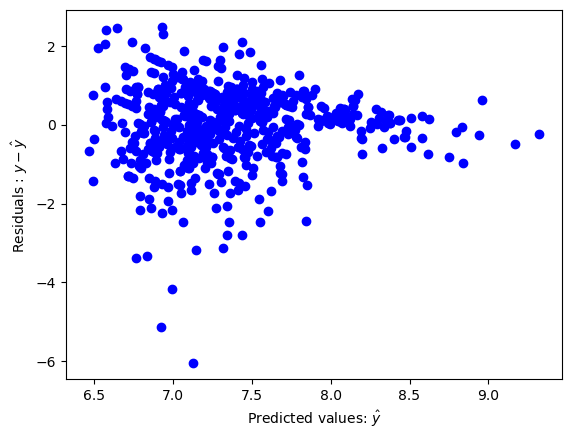

In [671]:
plt.plot(results.predict(X_new),
         results.resid/np.std(results.resid),'bo')
plt.xlabel(r"Predicted values: $\hat{y}$")
plt.ylabel(r"Residuals : $y - \hat{y}$")

Наблюдаем выбросы, причем в большом количестве!!! Удалим их.

In [672]:
mask = np.abs(results.resid/np.std(results.resid))<2

final_result = sm.OLS(y[mask],X_new[mask]).fit()
final_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     166.0
Date:                Sat, 21 Dec 2024   Prob (F-statistic):           7.61e-92
Time:                        16:09:53   Log-Likelihood:                -303.71
No. Observations:                 532   AIC:                             617.4
Df Residuals:                     527   BIC:                             638.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.5800      3.437     11.225      0.000      31.828      45.332
Date          -0.0202      0.002    -12.043      0.000      -0.024      -0.017
Duration       0.0070      0.001      7.108      0.000       0.005       0.009
Votes          0.6890      0.039     17.679      0.000       0.612       0.766
Alcohol       -0.1312      0.031     -4.185      0.000      -0.193      -0.070
==============================================================================
Omnibus:                        9.545   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.001
Skew:                          -0.273   Prob(JB):                       0.0111
Kurtosis:                       2.671   Cond. No.                     3.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals : $y - \\hat{y}$')

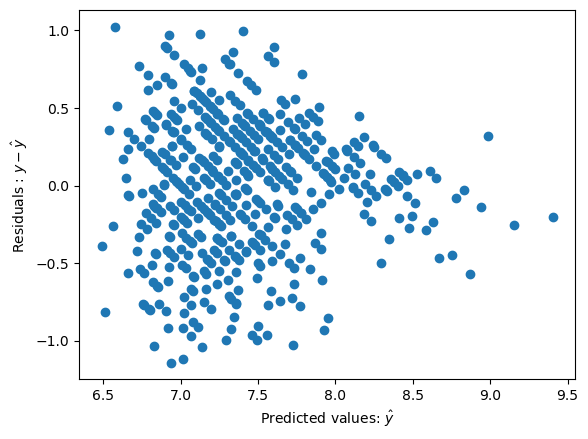

In [673]:
plt.plot(final_result.predict(),final_result.resid,'o');
plt.xlabel(r"Predicted values: $\hat{y}$")
plt.ylabel(r"Residuals : $y - \hat{y}$")

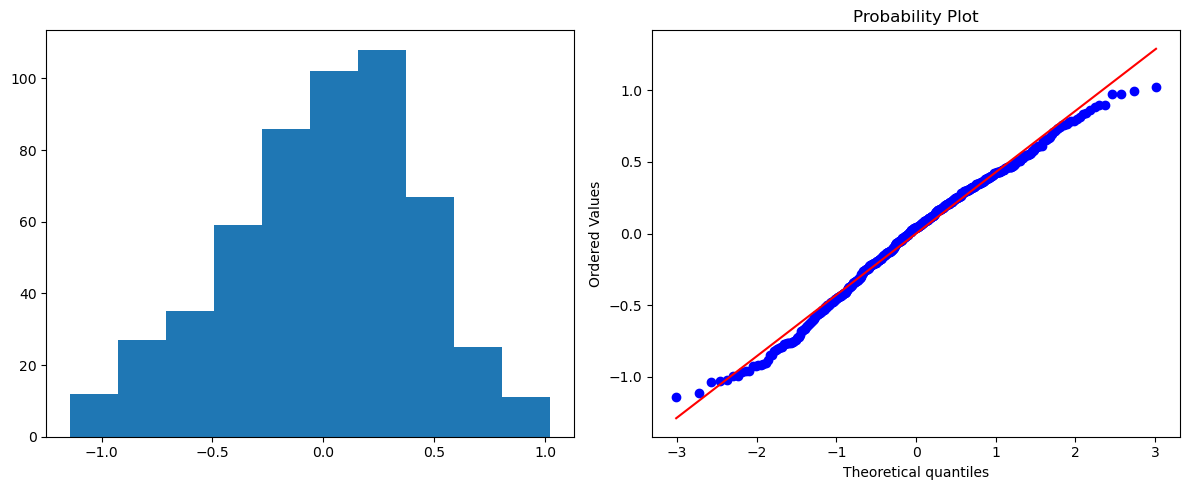

In [674]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(final_result.resid)

ax = plt.subplot(1,2,2)
stats.probplot(final_result.resid,plot=ax);
plt.tight_layout()

In [675]:
stats.shapiro(final_result.resid)

ShapiroResult(statistic=0.989646835116799, pvalue=0.0008369267607410283)

Что можно заметить:
1. Остатки распределены не нормально - не понятно почему
2. От мультиколлинеарности избавиться не удалось, хотя матрица корреляции говорит о том, что итоговые выбранные предикторы не коррелируют между собой.
3. Посмотрим на значения ```final_result.summary() ```

|lol        |   coef    |   std err |   t       | P>(t)     |   0,025   |   0,975   |
| ---       | ---       | ---       | ---       | ---       | ---       | ---       |
|const      |   38.5800 |   3.437   |	11.225  |	0.000	|   31.828  |	45.332  |
|Date       |	-0.0202 |	0.002   |	-12.043 |   0.000   |	-0.024  |	-0.017  |
|Duration   |	0.0070  |	0.001   |	7.108   |	0.000   |	0.005   |	0.009   |
|Votes      |	0.6890  |	0.039   |	17.679  |	0.000   |	0.612   |	0.766   |
|Alcohol    |	-0.1312 |	0.031   |   -4.185  |	0.000   |	-0.193  |   -0.070  |

Смотрим на столбец ```coef```. Значение коэффициента соответствует изменению зависимой переменной при изменении независимой на единицу при прочих (других независимых переменных) равных. Знак показывает направление изменения. 

Таким образом, что если число голосов логарифмической шкале увеличивается на 1, то рейтинг увеличивается. А чем больше внимания уделено алгоколю в фильме, тем ниже его рейтинг. Ну и т.д.